In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# installing the libraries
!pip install nltk
!pip install wordcloud
!pip install gensim
!pip install keras
!pip install tensorflow
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 3.0 MB/s eta 0:00:00


In [ ]:
%load_ext autoreload
%autoreload 2
'''
This code loads the autoreload extension and sets it to reload modules every time before executing code.
This is useful to avoid having to restart the kernel every time you make changes to external Python files.
'''

'\nThis code loads the autoreload extension and sets it to reload modules every time before executing code.\nThis is useful to avoid having to restart the kernel every time you make changes to external Python files.\n'

Loading Datasets and Creating Dataframe

In [ ]:
# importing the libraries
import nltk
nltk.download('punkt')

import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# importing libraries
import pandas as pd
import numpy as np

true_path = '/content/drive/MyDrive/True.csv'
fake_path = '/content/drive/MyDrive/Fake.csv'

true_df = pd.read_csv(true_path)
fake_df = pd.read_csv(fake_path)

In [ ]:
# display true dataset
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
# display fake dataset
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


Data Visualization

<ipython-input-8-6e078d86079a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="subject", palette="hls", data=true_df).set_title('True News Subject Distribution')


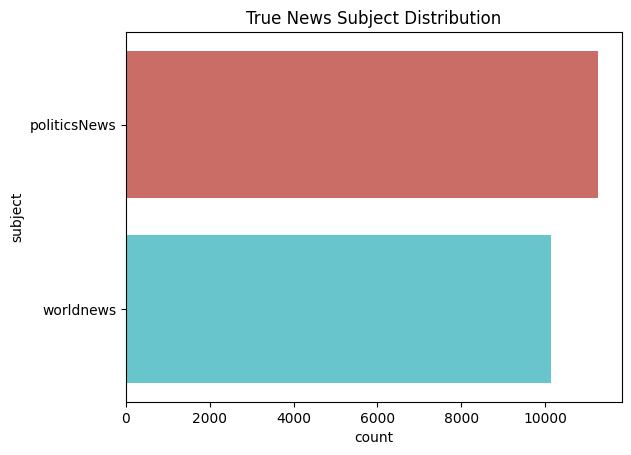

<ipython-input-8-6e078d86079a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="subject", palette="hls", data=fake_df).set_title('Fake News Subject Distribution')


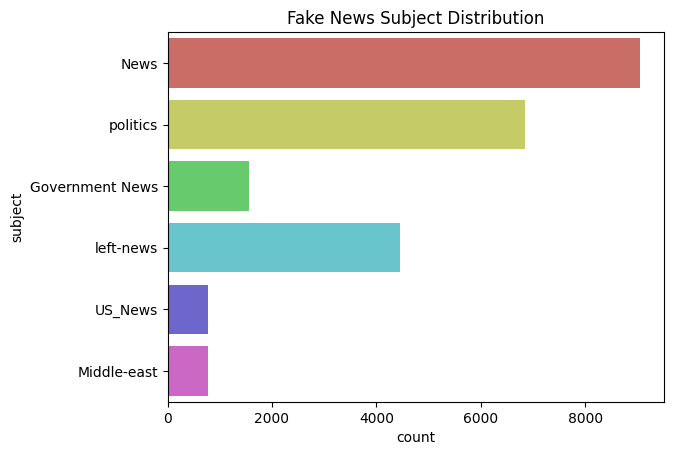

In [ ]:
# importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y="subject", palette="hls", data=true_df).set_title('True News Subject Distribution')
plt.show()

sns.countplot(y="subject", palette="hls", data=fake_df).set_title('Fake News Subject Distribution')
plt.show()

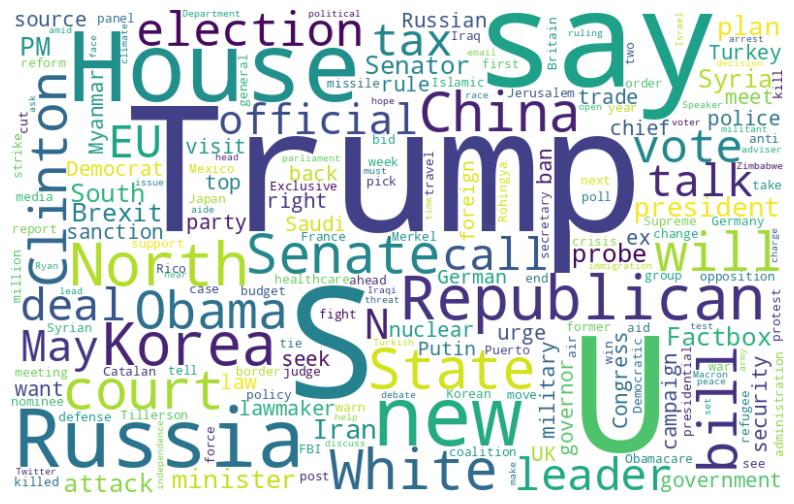

In [ ]:
# true news word cloud
from wordcloud import WordCloud

real_titles = true_df.title
real_titles_ls = [text for text in real_titles]
# print(alls)
real_all_words = ' '.join(real_titles)
wordcloud_real = WordCloud(background_color='white',
    width= 800, height= 500,
    max_font_size = 180,
    collocations = False).generate(real_all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis("off")
plt.show()


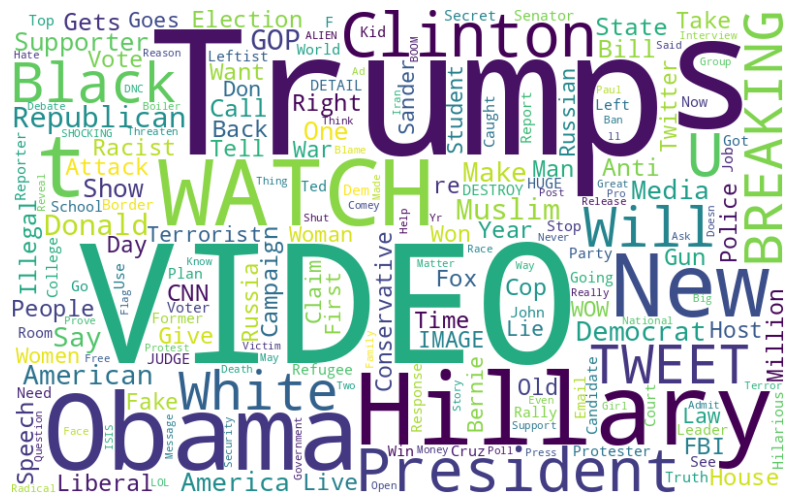

In [ ]:
fake_titles = fake_df.title
fake_titles_ls = [text for text in fake_titles]
# print(alls)
fake_all_words = ' '.join(fake_titles)
wordcloud_fake = WordCloud(background_color='white',
    width= 800, height= 500,
    max_font_size = 180,
    collocations = False).generate(fake_all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis("off")
plt.show()

Data Pre Processing

In [ ]:
# add label column to both df
true_df['true'] = 1
fake_df['true'] = 0

# Concate both the datasets
df = pd.concat([true_df, fake_df])
display(df)


,title,text,subject,date,true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [ ]:
# inspecting the news headlines

titles = [text for text in df.title]

max_len = 0
titles_len = []
for title in titles:
    titles_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)

print('Number of titles:', len(titles))
print('Max length of the titles:', max_len)
print('Mean length of the titles:', np.mean(titles_len))

Number of titles: 44898
Max length of the titles: 42
Mean length of the titles: 12.453472315025168


<ipython-input-13-e250f0f4cf1c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x=titles_len, palette="hls")
<ipython-input-13-e250f0f4cf1c>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=50)


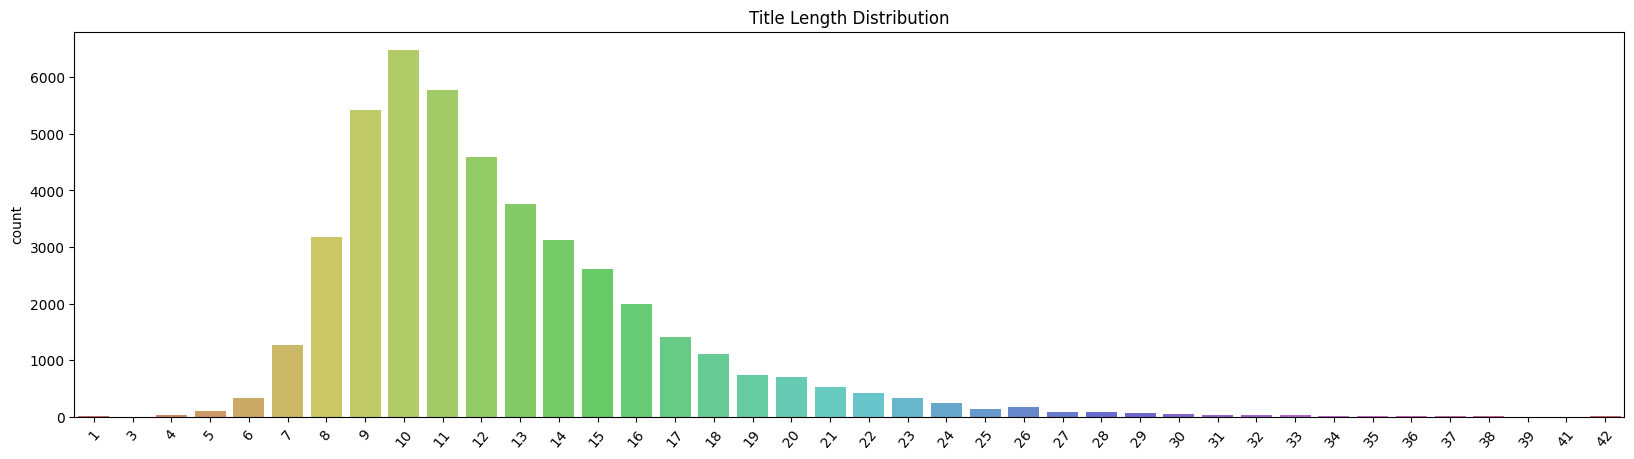

In [ ]:
# visualizing the title variable
plt.figure(figsize=(20,5))
g = sns.countplot(x=titles_len, palette="hls")
g.set_title('Title Length Distribution')
g.set_xticklabels(g.get_xticklabels(), rotation=50)
plt.show()

In [ ]:
# mean length of the texts
texts = [text for text in df.text]

max_len = 0
texts_len = []
for text in texts:
    texts_len.append(len(text.split()))
    max_len = max(len(text.split()), max_len)

# g = sns.countplot(x=texts_len)
print('Mean length of the texts:', np.mean(texts_len))

Mean length of the texts: 405.28228428883244


In [ ]:
# removing irrelevant columns and shuffling the dataset
from sklearn.utils import shuffle

# Purify
df = df.iloc[:,[0, -1]]

# Shuffle
df = shuffle(df).reset_index(drop=True)

display(df)




,title,true
0,FARC dissidents face full force of Colombia mi...,1
1,WATCH VETERAN Embarrass Trump Hater In Kansas ...,0
2,WATCH: CNN Smacks Down Rudy Giuliani So Hard ...,0
3,Mexicans' positive view of the U.S. collapses ...,1
4,Palestinians may seek U.N. Assembly support if...,1
...,...,...
44893,Kuwait denies it imposed travel ban praised by...,1
44894,WOW! DOCUMENT Shows Teachers How To Teach Hist...,0
44895,Pope faces diplomatic dilemma in Myanmar visit,1
44896,2016 Campaign Coverage WRECKS ‘Liberal Media ...,0


In [ ]:
# splitting dataset into train, validation and test
train_val_df = df.sample(frac = 0.8)
test_df = df.drop(train_val_df.index)

train_df = train_val_df.sample(frac = 0.8)
val_df = train_val_df.drop(train_df.index)

# Reset Index
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print('trainset size:', train_df.shape)
print('valset size:', val_df.shape)
print('testset size:', test_df.shape)

trainset size: (28734, 2)
valset size: (7184, 2)
testset size: (8980, 2)


In [ ]:
# dataframe to csv
train_df.to_csv('train.tsv', sep='\t', index=False)
val_df.to_csv('val.tsv', sep='\t', index=False)
test_df.to_csv('test.tsv', sep='\t', index=False)

In [ ]:
df = pd.concat([train_df, val_df, test_df])
df

,title,true
0,Devin Nunes’ Credibility Is Officially SHATTE...,0
1,A MUST WATCH: The Islamization Of Our Schools ...,0
2,U.S. isolated on climate at summit of world le...,1
3,U.S. Women’s Soccer Star Megan Rapinoe Kneels...,0
4,"Dear Liberal, Why I’m So Hostile…And How “Your...",0
...,...,...
8975,"Irish deputy PM resigns, averting election threat",1
8976,House to write tax reform bill this fall: Hous...,1
8977,TRUMP MAKES JOKE TO COPS…The Loony Left Freaks...,0
8978,Kuwait denies it imposed travel ban praised by...,1


In [ ]:
# data cleaning
import nltk
# Downloading Stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Removing Stopwords And Remove Words With 2 Or Less Characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    return result

In [ ]:
import gensim

# Applying The Function To The Dataframe
df['clean'] = df['title'].apply(preprocess)

In [ ]:
df

,title,true,clean
0,Devin Nunes’ Credibility Is Officially SHATTE...,0,"[devin, nunes, credibility, officially, shatte..."
1,A MUST WATCH: The Islamization Of Our Schools ...,0,"[watch, islamization, schools, video]"
2,U.S. isolated on climate at summit of world le...,1,"[isolated, climate, summit, world, leaders]"
3,U.S. Women’s Soccer Star Megan Rapinoe Kneels...,0,"[women, soccer, star, megan, rapinoe, kneels, ..."
4,"Dear Liberal, Why I’m So Hostile…And How “Your...",0,"[dear, liberal, hostile, political, beliefs, t..."
...,...,...,...
8975,"Irish deputy PM resigns, averting election threat",1,"[irish, deputy, resigns, averting, election, t..."
8976,House to write tax reform bill this fall: Hous...,1,"[house, write, reform, fall, house, speaker]"
8977,TRUMP MAKES JOKE TO COPS…The Loony Left Freaks...,0,"[trump, makes, joke, cops, loony, left, freaks..."
8978,Kuwait denies it imposed travel ban praised by...,1,"[kuwait, denies, imposed, travel, praised, trump]"


In [ ]:
# total words in the dataset
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

total_words = len(list(set(list_of_words)))
total_words

19174

tokenization and padding

In [ ]:
from nltk import word_tokenize

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Creating A Tokenizer To Tokenize The Words And Create Sequences Of Tokenized Words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(train_df['title'])

train_sequences = tokenizer.texts_to_sequences(train_df['title'])
val_sequences = tokenizer.texts_to_sequences(val_df['title'])
test_sequences = tokenizer.texts_to_sequences(test_df['title'])

In [ ]:
len(train_sequences)

28734

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Adding Padding
padded_train = pad_sequences(train_sequences,maxlen = 42, padding = 'post', truncating = 'post')
padded_val = pad_sequences(val_sequences,maxlen = 42, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 42, padding = 'post', truncating = 'post')


# Model Building

In [ ]:
# LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout, BatchNormalization

## Creating model Using LSTM
embedding_vector_features=40
model=Sequential()
model.add(Embedding(total_words,embedding_vector_features))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 40)          766960    
                                                                 
 dropout_10 (Dropout)        (None, None, 40)          0         
                                                                 
 lstm_5 (LSTM)               (None, 100)               56400     
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 823461 (3.14 MB)
Trainable params: 823461 (3.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
y_train = np.asarray(train_df['true'])
y_val = np.asarray(val_df['true'])

# Training the model
model.fit(padded_train, y_train, batch_size = 64, validation_data=(padded_val, y_val), epochs = 3)


Epoch 1/3
449/449 [==============================] - 23s 46ms/step - loss: 0.2063 - accuracy: 0.8968 - val_loss: 0.0819 - val_accuracy: 0.9702
Epoch 2/3
449/449 [==============================] - 21s 46ms/step - loss: 0.0557 - accuracy: 0.9815 - val_loss: 0.0925 - val_accuracy: 0.9691
Epoch 3/3
449/449 [==============================] - 21s 46ms/step - loss: 0.0298 - accuracy: 0.9905 - val_loss: 0.1185 - val_accuracy: 0.9697


281/281 [==============================] - 3s 8ms/step
LSTM Model Accuracy :  0.9674832962138085
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      4703
           1       0.96      0.97      0.97      4277

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



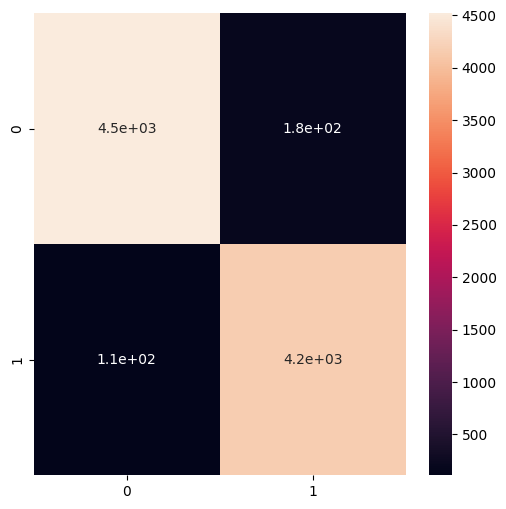

In [ ]:
# Making prediction
pred = model.predict(padded_test)
prediction = []
for i in pred:
    if i >= 0.5:
        prediction.append(1)
    else:
        prediction.append(0)
# Getting The Accuracy
from sklearn.metrics import accuracy_score
y_test = np.asarray(test_df['true'])

accuracy = accuracy_score(list(y_test), prediction)

print("LSTM Model Accuracy : ", accuracy)


# Getting The Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True)

from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))


In [ ]:
# building bidirectional LSTM model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(total_words,embedding_vector_features))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 40)          766960    
                                                                 
 dropout_14 (Dropout)        (None, None, 40)          0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 200)               112800    
 onal)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 200)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 201       
                                                                 
Total params: 879961 (3.36 MB)
Trainable params: 879961 (3.36 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
y_train = np.asarray(train_df['true'])
y_val = np.asarray(val_df['true'])

# Training the model
model.fit(padded_train, y_train, batch_size = 64, validation_data=(padded_val, y_val), epochs = 3)

Epoch 1/3
449/449 [==============================] - 27s 52ms/step - loss: 0.1936 - accuracy: 0.9192 - val_loss: 0.0959 - val_accuracy: 0.9634
Epoch 2/3
449/449 [==============================] - 23s 50ms/step - loss: 0.0540 - accuracy: 0.9811 - val_loss: 0.0755 - val_accuracy: 0.9726
Epoch 3/3
449/449 [==============================] - 22s 50ms/step - loss: 0.0259 - accuracy: 0.9912 - val_loss: 0.0939 - val_accuracy: 0.9684


281/281 [==============================] - 3s 10ms/step
Bidirectional LSTM Model Accuracy :  0.9700445434298441
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4703
           1       0.98      0.96      0.97      4277

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



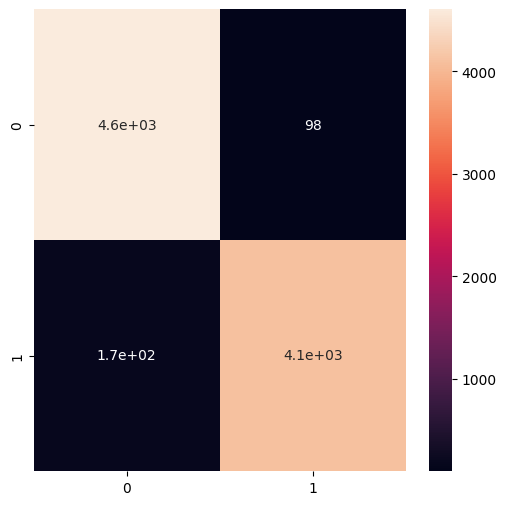

In [ ]:
# Making prediction
pred = model.predict(padded_test)
prediction = []
for i in pred:
    if i >= 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

# Getting The Accuracy
y_test = np.asarray(test_df['true'])

accuracy = accuracy_score(list(y_test), prediction)

print("Bidirectional LSTM Model Accuracy : ", accuracy)

# Getting The Confusion Matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True)

print(classification_report(y_test, prediction))


In [ ]:
# building CNN-BiLSTM model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(total_words,embedding_vector_features))

model.add(Dropout(0.3))

model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D())

model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D())

model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 40)          766960    
                                                                 
 dropout_16 (Dropout)        (None, None, 40)          0         
                                                                 
 conv1d (Conv1D)             (None, None, 32)          6432      
                                                                 
 max_pooling1d (MaxPooling1  (None, None, 32)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, None, 32)          5152      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, None, 32)          0         
 g1D)                                                 

In [ ]:
y_train = np.asarray(train_df['true'])
y_val = np.asarray(val_df['true'])

# Training the model
model.fit(padded_train, y_train, batch_size = 64, validation_data=(padded_val, y_val), epochs = 3)

Epoch 1/3
449/449 [==============================] - 13s 21ms/step - loss: 0.1767 - accuracy: 0.9254 - val_loss: 0.0849 - val_accuracy: 0.9678
Epoch 2/3
449/449 [==============================] - 8s 19ms/step - loss: 0.0473 - accuracy: 0.9840 - val_loss: 0.0789 - val_accuracy: 0.9712
Epoch 3/3
449/449 [==============================] - 8s 18ms/step - loss: 0.0191 - accuracy: 0.9940 - val_loss: 0.1060 - val_accuracy: 0.9729


281/281 [==============================] - 2s 4ms/step
CNN Model Accuracy :  0.9726057906458797
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4703
           1       0.97      0.98      0.97      4277

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



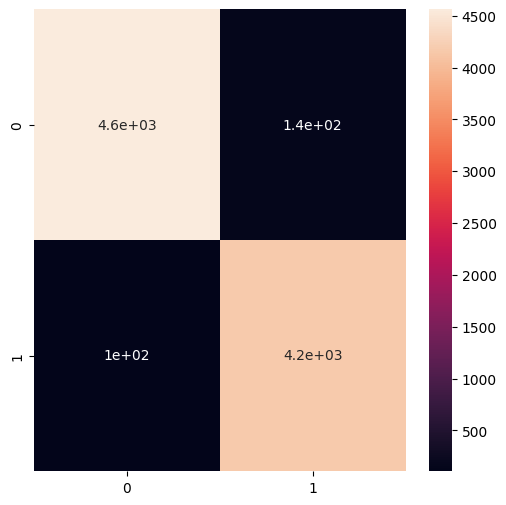

In [ ]:
# Making prediction
pred = model.predict(padded_test)
prediction = []
for i in pred:
    if i >= 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

# Getting The Accuracy
y_test = np.asarray(test_df['true'])

accuracy = accuracy_score(list(y_test), prediction)

print("CNN Model Accuracy : ", accuracy)


# Getting The Confusion Matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True)

print(classification_report(y_test, prediction))